# Hedging with Black-Scholes model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum 
from mpl_toolkits import mplot3d
from scipy.interpolate import RegularGridInterpolator

In [3]:
# This class defines puts and calls
class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0

In [2]:
def GeneratePathsGBM(NoOfPaths, NoOfSteps, T, r, sigma, S_0):    
    Z = np.random.normal(0.0, 1.0,[NoOfPaths, NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps + 1])
    W = np.zeros([NoOfPaths, NoOfSteps + 1])
    time = np.zeros([NoOfSteps + 1])
        
    X[:, 0] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
            
        W[:, i+1] = W[:, i] + np.power(dt, 0.5)*Z[:, i]
        X[:, i+1] = X[:, i] + (r - 0.5 * sigma * sigma) * dt + sigma * (W[:, i+1]-W[:, i])
        
        time[i+1] = time[i] +dt
        
    #Compute exponent of ABM
    S = np.exp(X)
    paths = {"time":time,"S":S}
    
    return paths

In [4]:
# Black-Scholes Call option price
def BS_Call_Put_Option_Price(CP, S_0, K, sigma, t, T, r):
    K = np.array(K).reshape([len(K),1])
    
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * (T-t)) / (sigma * np.sqrt(T - t))
    d2    = d1 - sigma * np.sqrt(T-t)
    
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * (T - t))
    elif CP == OptionType.PUT:
        value = st.norm.cdf(-d2) * K * np.exp(-r * (T - t)) - st.norm.cdf(-d1)*S_0
    return value

In [5]:
def BS_Delta(CP,S_0,K,sigma,t,T,r):
    # when defining a time-grid it may happen that the last grid point 
    # is slightly after the maturity
    if (t - T) > 10e-20 and (T - t) < 10e-7:
        t = T
    K = np.array(K).reshape([len(K),1])
    d1 = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * (T - t)) / (sigma * np.sqrt(T - t))
    
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1)
    elif CP == OptionType.PUT:
        value = st.norm.cdf(d1)-1.0
    return value


path_id =  0, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.8529,S(t_m) = 1.0098, max(S(tm)-K,0)= 0.0598, PnL(t_m) = -0.0158
path_id =  1, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.3467,S(t_m) = 0.9671, max(S(tm)-K,0)= 0.0171, PnL(t_m) = 0.0256
path_id =  2, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9281,S(t_m) = 1.1393, max(S(tm)-K,0)= 0.1893, PnL(t_m) = 0.0034
path_id =  3, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.2928,S(t_m) = 0.9671, max(S(tm)-K,0)= 0.0171, PnL(t_m) = 0.0228
path_id =  4, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9460,S(t_m) = 1.2534, max(S(tm)-K,0)= 0.3034, PnL(t_m) = -0.0056
path_id =  5, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9217,S(t_m) = 1.2090, max(S(tm)-K,0)= 0.2590, PnL(t_m) = 0.0174
path_id =  6, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9354,S(t_m) = 1.4466, max(S(tm)-K,0)= 0.4966, PnL(t_m) = 0.0052
path_id =  7, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.5208,S(t_m) = 1.0072, max(S(tm)-K,0)= 0.0572, PnL(t_m) = 0.0118
path_id =  8, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9080,S(t_m) = 1.1847, max(S(tm)-K,0)= 0.2347, PnL(t_m) = 0.0241
path_id 

path_id = 2821, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.0149,S(t_m) = 0.7739, max(S(tm)-K,0)= -0.1761, PnL(t_m) = -0.0149
path_id = 2822, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.2643,S(t_m) = 0.8159, max(S(tm)-K,0)= -0.1341, PnL(t_m) = -0.0098
path_id = 2823, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9405,S(t_m) = 1.2712, max(S(tm)-K,0)= 0.3212, PnL(t_m) = 0.0001
path_id = 2824, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9340,S(t_m) = 1.2274, max(S(tm)-K,0)= 0.2774, PnL(t_m) = 0.0064
path_id = 2825, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9344,S(t_m) = 1.1879, max(S(tm)-K,0)= 0.2379, PnL(t_m) = 0.0060
path_id = 2826, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9284,S(t_m) = 1.0288, max(S(tm)-K,0)= 0.0788, PnL(t_m) = 0.0109
path_id = 2827, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.8465,S(t_m) = 0.9953, max(S(tm)-K,0)= 0.0453, PnL(t_m) = 0.0077
path_id = 2828, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9461,S(t_m) = 1.2732, max(S(tm)-K,0)= 0.3232, PnL(t_m) = -0.0056
path_id = 2829, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9473,S(t_m) = 1.5627, max(S(tm)-K,0)= 0.6127, PnL(t

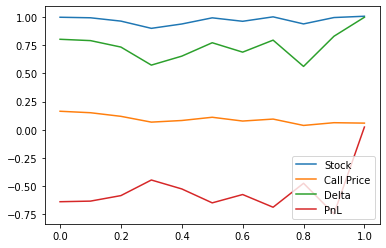

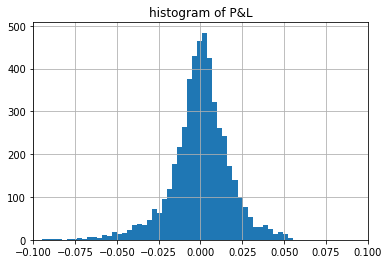

In [17]:
def mainCalculation():
    NoOfPaths = 5000
    NoOfSteps = 10
    T     = 1
    r     = 0.1
    sigma = 0.2
    s0    = 1
    K     = [0.95]
    CP    = OptionType.CALL
    
    np.random.seed(1)
    
    Paths = GeneratePathsGBM(NoOfPaths, NoOfSteps, T, r, sigma, s0)
    time  = Paths["time"]
    S = Paths["S"]
    
    # Setting up some lambda
    # function for value of option depends on t
    C = lambda t, K, S0: BS_Call_Put_Option_Price(CP, S0, K, sigma, t, T, r)
    # Value of delta hedging depends on t
    Delta = lambda t, K, S0: BS_Delta(CP, S0, K, sigma, t, T, r)
    
    # Setting up initial portfolio
    # Profit and Loss function for hedging
    PnL = np.zeros([NoOfPaths, NoOfSteps + 1])
    delta_init = Delta(0.0, K, s0)
    # PnL at t0
    PnL[:, 0] = C(0.0, K, s0) - delta_init * s0
    
    # Matrix of Call price
    CallM = np.zeros([NoOfPaths, NoOfSteps + 1])
    CallM[:, 0] = C(0, K, s0)
    # Matrix of delta
    DeltaM = np.zeros([NoOfPaths, NoOfSteps + 1])
    DeltaM[:, 0] = Delta(0, K, s0)
    
    for i in range(1, NoOfSteps + 1):
        dt = time[i] - time[i - 1]
        delta_old  = Delta(time[i - 1], K, S[:, i - 1])
        delta_curr = Delta(time[i], K, S[:, i]) 
        
        # PnL at t
        PnL[:,i]    =  PnL[:, i - 1] * np.exp(r * dt) - (delta_curr - delta_old) * S[:, i]
        
        CallM[:, i]  = C(time[i], K, S[:, i])
        DeltaM[:, i] = delta_curr
        
    # final transaction, payment of the option (if in the money) and selling the hedge
    PnL[:,-1] = PnL[:,-1] -np.maximum(S[:,-1]-K,0) +  DeltaM[:,-1]*S[:,-1]
    
    # We plot only one path at the time
    path_id = 13
    plt.figure(1)
    plt.plot(time, S[path_id, :])
    plt.plot(time, CallM[path_id, :])
    plt.plot(time, DeltaM[path_id, :])
    plt.plot(time, PnL[path_id, :])
    plt.legend(['Stock', 'Call Price', 'Delta', 'PnL'])
    
    # Plot the histogram of PnL
    plt.figure(2)
    plt.hist(PnL[:, -1], 50)
    plt.grid()
    plt.xlim([-0.1,0.1])
    plt.title('histogram of P&L')
    
    # Analysis for each path
    for i in range(0,NoOfPaths):
        print('path_id = {0:2d}, PnL(t_0)={1:0.4f}, PnL(Tm-1) ={2:0.4f},S(t_m) = {3:0.4f}, max(S(tm)-K,0)= {4:0.4f}, PnL(t_m) = {5:0.4f}'.format(i, PnL[0, 0], PnL[i, -2], S[i, -1], np.max(S[i,-1]-K,0), PnL[i,-1]))
        
mainCalculation()

The frequency of hedging affects the PnL, the higher frequency help distribution of PnL much more narrow

# With Jump

In [19]:
def GeneratePathsMerton(NoOfPaths, NoOfSteps, S0, T, xiP, muJ, sigmaJ, r, sigma):    
    # Create empty matrices for Poisson process and for compensated Poisson process
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
                
    dt = T / float(NoOfSteps)
    X[:,0] = np.log(S0)
    S[:,0] = S0
    
    # Expectation E(e^J) for J~N(muJ,sigmaJ^2)
    EeJ = np.exp(muJ + 0.5*sigmaJ*sigmaJ)
    ZPois = np.random.poisson(xiP*dt,[NoOfPaths,NoOfSteps])
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    J = np.random.normal(muJ,sigmaJ,[NoOfPaths,NoOfSteps])
    
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        # making sure that samples from normal have mean 0 and variance 1
        X[:, i+1]  = X[:, i] + (r - xiP*(EeJ-1) - 0.5*sigma*sigma)*dt +sigma*np.sqrt(dt)* Z[:, i]\
                    + J[:, i] * ZPois[:, i]
        time[i+1] = time[i] +dt
        
    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths

C:\Users\NGUYEN Xuan Vinh\AppData\Local\Temp\ipykernel_26156\660280306.py:7: RuntimeWarning: divide by zero encountered in true_divide
  d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
C:\Users\NGUYEN Xuan Vinh\AppData\Local\Temp\ipykernel_26156\2091223182.py:5: RuntimeWarning: invalid value encountered in sqrt
  d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * (T-t)) / (sigma * np.sqrt(T - t))
C:\Users\NGUYEN Xuan Vinh\AppData\Local\Temp\ipykernel_26156\2091223182.py:6: RuntimeWarning: invalid value encountered in sqrt
  d2    = d1 - sigma * np.sqrt(T-t)


path_id =  0, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9458,S(t_m) = 1.0887, max(S(tm)-K,0)= 0.1387, PnL(t_m) = 0.0037
path_id =  1, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9829,S(t_m) = 1.1607, max(S(tm)-K,0)= 0.2107, PnL(t_m) = -0.0334
path_id =  2, PnL(t_0)=-0.6397, PnL(Tm-1) =0.0014,S(t_m) = 0.9042, max(S(tm)-K,0)= -0.0458, PnL(t_m) = 0.0025
path_id =  3, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.0286,S(t_m) = 0.6899, max(S(tm)-K,0)= -0.2601, PnL(t_m) = -0.0286
path_id =  4, PnL(t_0)=-0.6397, PnL(Tm-1) =0.0019,S(t_m) = 0.7179, max(S(tm)-K,0)= -0.2321, PnL(t_m) = 0.0019
path_id =  5, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9497,S(t_m) = 1.3831, max(S(tm)-K,0)= 0.4331, PnL(t_m) = -0.0002
path_id =  6, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9929,S(t_m) = 1.3521, max(S(tm)-K,0)= 0.4021, PnL(t_m) = -0.0434
path_id =  7, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.9535,S(t_m) = 1.7689, max(S(tm)-K,0)= 0.8189, PnL(t_m) = -0.0040
path_id =  8, PnL(t_0)=-0.6397, PnL(Tm-1) =-0.0679,S(t_m) = 0.7277, max(S(tm)-K,0)= -0.2223, PnL(t_m) = -0.0680
pa

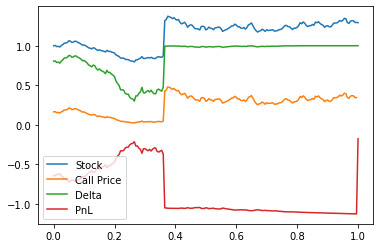

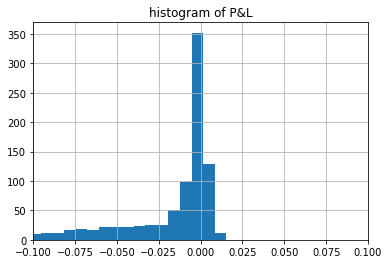

In [28]:
def mainCalculation_Jump():
    NoOfPaths = 1000
    NoOfSteps = 200
    T         = 1.0
    r         = 0.1
    sigma     = 0.2
    xiP       = 1.0
    muJ       = 0.0
    sigmaJ    = 0.25
    s0        = 1.0
    K         = [0.95]
    CP        = OptionType.CALL
    
    np.random.seed(7)
    
    np.random.seed(7)
    Paths = GeneratePathsMerton(NoOfPaths, NoOfSteps, s0, T, xiP, muJ, sigmaJ, r, sigma)
    time  = Paths["time"]
    S     = Paths["S"]
    
    # Setting up some lambda
    # Value of option and delta is still based on the BS model
    # function for value of option depends on t
    # In reality, delta should correspond to the model used for hedging
    # Here is for illustration
    C = lambda t, K, S0: BS_Call_Put_Option_Price(CP, S0, K, sigma, t, T, r)
    # Value of delta hedging depends on t
    Delta = lambda t, K, S0: BS_Delta(CP, S0, K, sigma, t, T, r)
    
    # Setting up initial portfolio
    # Profit and Loss function for hedging
    PnL = np.zeros([NoOfPaths, NoOfSteps + 1])
    delta_init = Delta(0.0, K, s0)
    # PnL at t0
    PnL[:, 0] = C(0.0, K, s0) - delta_init * s0
    
    # Matrix of Call price
    CallM = np.zeros([NoOfPaths, NoOfSteps + 1])
    CallM[:, 0] = C(0, K, s0)
    # Matrix of delta
    DeltaM = np.zeros([NoOfPaths, NoOfSteps + 1])
    DeltaM[:, 0] = Delta(0, K, s0)
    
    for i in range(1, NoOfSteps + 1):
        dt = time[i] - time[i - 1]
        delta_old  = Delta(time[i - 1], K, S[:, i - 1])
        delta_curr = Delta(time[i], K, S[:, i]) 
        
        # PnL at t
        PnL[:,i]    =  PnL[:, i - 1] * np.exp(r * dt) - (delta_curr - delta_old) * S[:, i]
        
        CallM[:, i]  = C(time[i], K, S[:, i])
        DeltaM[:, i] = delta_curr
        
    # final transaction, payment of the option (if in the money) and selling the hedge
    PnL[:,-1] = PnL[:,-1] -np.maximum(S[:,-1]-K,0) +  DeltaM[:,-1]*S[:,-1]
    
    # We plot only one path at the time
    path_id = 10
    plt.figure(1)
    plt.plot(time, S[path_id, :])
    plt.plot(time, CallM[path_id, :])
    plt.plot(time, DeltaM[path_id, :])
    plt.plot(time, PnL[path_id, :])
    plt.legend(['Stock', 'Call Price', 'Delta', 'PnL'])
    
    # Plot the histogram of PnL
    plt.figure(10)
    plt.hist(PnL[:, -1], 100)
    plt.grid()
    plt.xlim([-0.1,0.1])
    plt.title('histogram of P&L')
    
    # Analysis for each path
    for i in range(0,NoOfPaths):
        print('path_id = {0:2d}, PnL(t_0)={1:0.4f}, PnL(Tm-1) ={2:0.4f},S(t_m) = {3:0.4f}, max(S(tm)-K,0)= {4:0.4f}, PnL(t_m) = {5:0.4f}'.format(i, PnL[0, 0], PnL[i, -2], S[i, -1], np.max(S[i,-1]-K,0), PnL[i,-1]))
        
mainCalculation_Jump()

Increase of frequency of re-hedging does not affect distribution of PnL. So Diffusion jump model doesn't frequently used in practice. Model like Heston is more commontly used.